<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

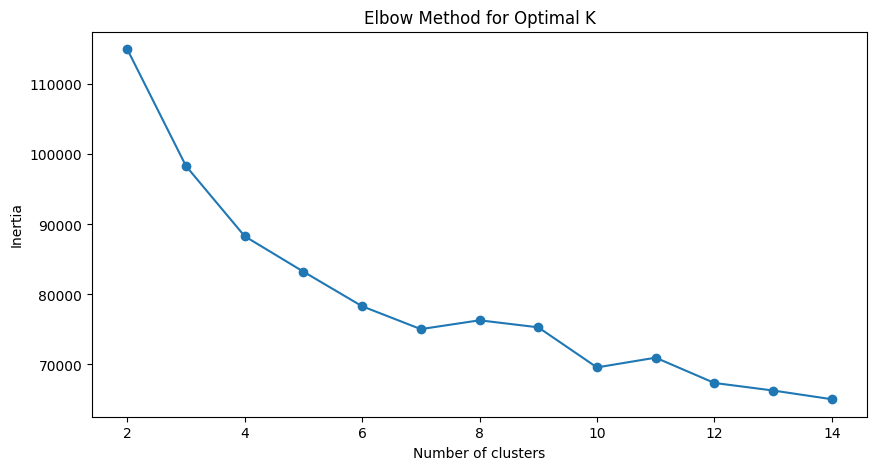

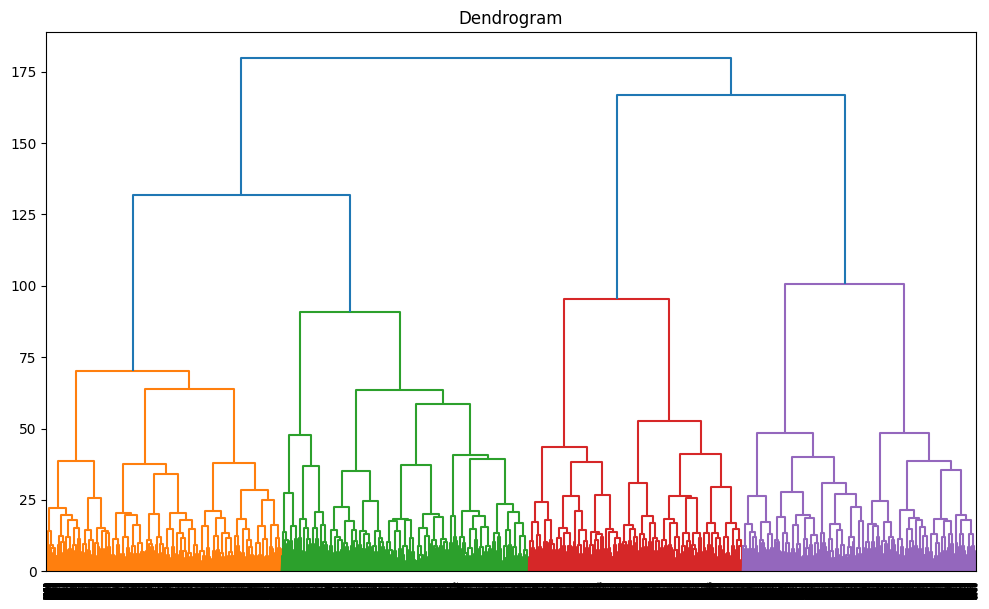

KMeans:
Silhouette: 0.18191099370365169
Calinski-Harabasz: 1403.1127108056419
Davies-Bouldin: 1.887058801832768

Agglomerative:
Silhouette: 0.16479178758952762
Calinski-Harabasz: 1273.1327457411987
Davies-Bouldin: 2.026810584022866

DBSCAN:
Silhouette: 0.1796354299765333
Calinski-Harabasz: 1073.954766015884
Davies-Bouldin: 1.6445080283600277


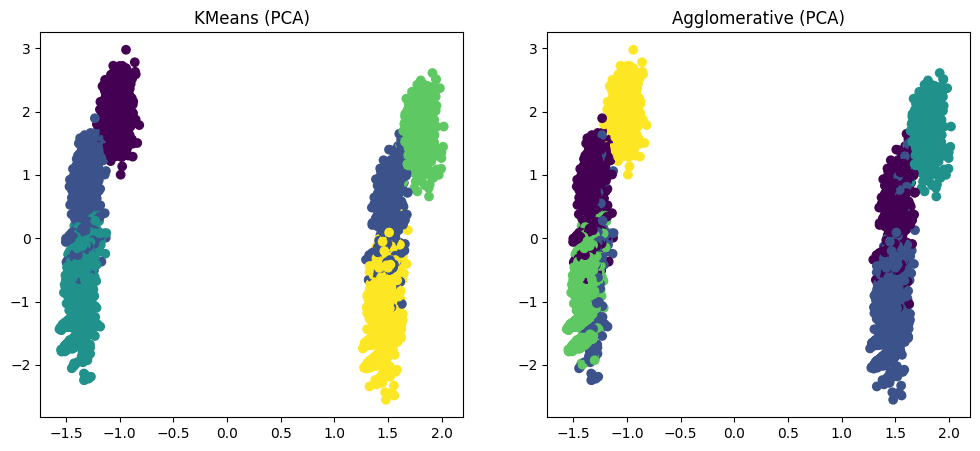

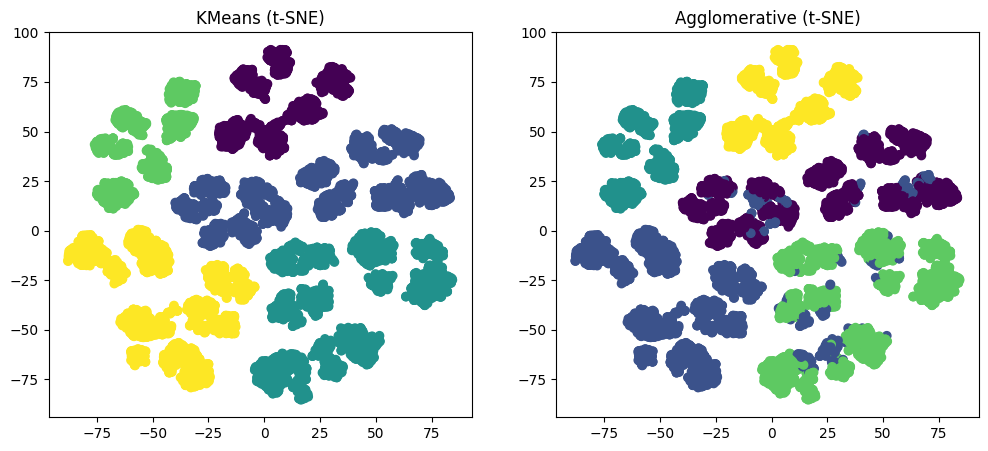

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)
data = data.drop_duplicates()
X = data.drop(['customer_id', 'churn'], axis=1)
# One-hot encode categorical variables
X = pd.get_dummies(X)
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. KMeans++ with Elbow Method
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose optimal k (example: 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 3. Agglomerative Clustering and Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# 4. DBSCAN Clustering (example parameters, may need tuning)
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 5. Clustering Evaluation
print("KMeans:")
print("Silhouette:", silhouette_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, kmeans_labels))
print("Davies-Bouldin:", davies_bouldin_score(X_scaled, kmeans_labels))

print("\nAgglomerative:")
print("Silhouette:", silhouette_score(X_scaled, agg_labels))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, agg_labels))
print("Davies-Bouldin:", davies_bouldin_score(X_scaled, agg_labels))

if len(set(dbscan_labels)) > 1:
    print("\nDBSCAN:")
    print("Silhouette:", silhouette_score(X_scaled, dbscan_labels))
    print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, dbscan_labels))
    print("Davies-Bouldin:", davies_bouldin_score(X_scaled, dbscan_labels))
else:
    print("\nDBSCAN: Not enough clusters for metrics.")

# 6. Visualization with PCA and t-SNE
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans (PCA)')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative (PCA)')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans (t-SNE)')
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative (t-SNE)')
plt.show()

# 7. Analysis and Conclusions (write in your report)
# - Compare silhouette, Calinski-Harabasz, and Davies-Bouldin scores.
# - Discuss which algorithm works best for your data.
# - Note advantages/disadvantages of each method.
